# Titanic EDA and visualization


When she was launched, the RMS Titanic was largest moving object ever built – 269 metres long and weighing 46,000 tons. One of three Olympic class ocean liners operated by the White Star Line, she was built between 1909–11 by the Harland and Wolff shipyard in Belfast. On 10 April 1912, the Titanic departed on its maiden voyage from Southampton to New York.

On 14 April 1912, despite warnings of ice fields, the ship did not reduce speed and struck an iceberg shortly before midnight. The iceberg ripped a long gash in the side and the ship began to flood. Passengers were unaware and joked about the ice found on the deck. The Captain ordered the lifeboats to be filled and lowered, with women and children first. More than two hours after hitting the iceberg, Titanic sank into the Atlantic Ocean.
* Source https://libguides.ncl.ac.uk/titanic

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Lets see how our data looks like.

In [2]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival - Survival (0 = No; 1 = Yes) class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) name - Name sex - Sex age - Age sibsp - Number of Siblings/Spouses Aboard parch - Number of Parents/Children Aboard ticket - Ticket Number fare - Passenger Fare cabin - Cabin embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Lets see if there is any missing data.

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


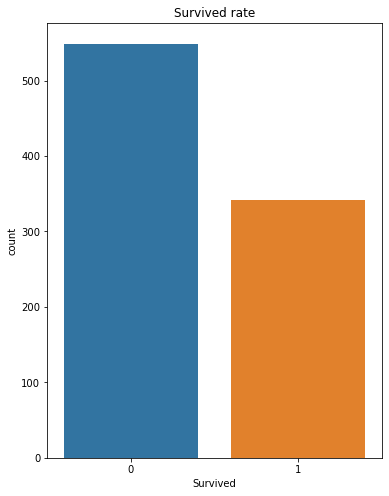

In [5]:
f, ax = plt.subplots(figsize=(6, 8))
plt.title("Survived rate")
sns.countplot('Survived',data=data)
plt.show()

Firstly lets check if there is any correlation between Sex and Survived.

In [6]:
data.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Seems like female were more likely to survive.

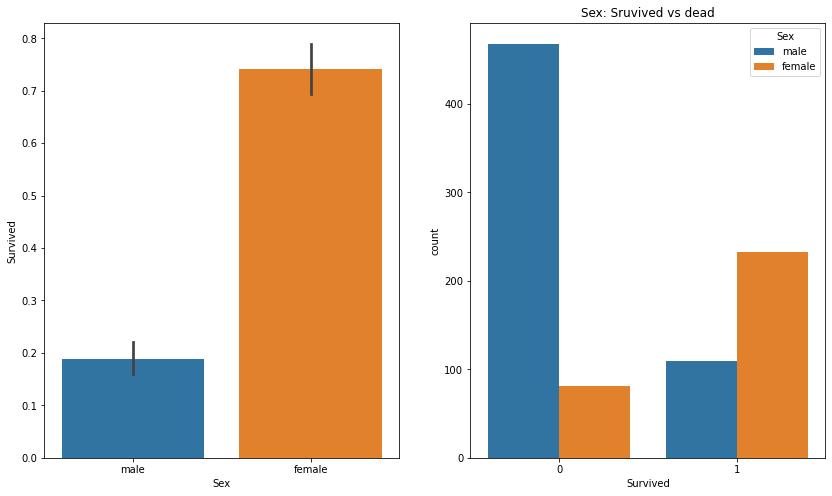

In [7]:
f, ax = plt.subplots(1,2,figsize=(14,8))
sns.barplot(x="Sex",y="Survived",data=data, ax=ax[0])
plt.title("Survived vs Sex")
sns.countplot(x="Survived",hue="Sex",data=data, ax=ax[1])
plt.title("Sex: Sruvived vs dead")
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

**Lets look at the second feature which is Pclass**

In [8]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

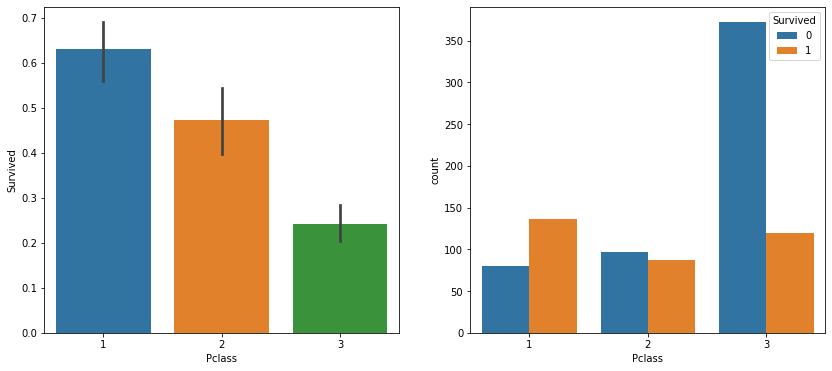

In [9]:
f, ax = plt.subplots(1,2,figsize=(14,6))
sns.barplot(x="Pclass",y="Survived",data=data,ax=ax[0])
sns.countplot(x="Pclass",hue="Survived",data=data,ax=ax[1])

data.groupby(["Survived","Pclass"])["Pclass"].count()
plt.show()

As i thought, people from first class had way higher survival rate than people from class 2 and 3 even when there was way more people on class 3.

In [10]:
data.groupby(["Survived","Pclass"])["Pclass"].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

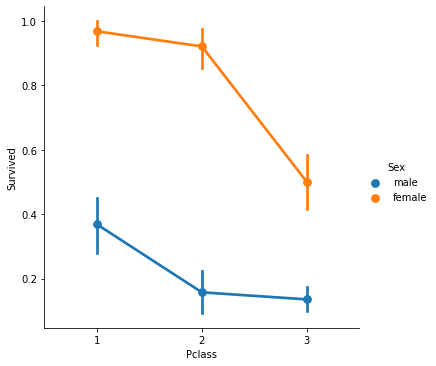

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

On a factorplot its way easier to look at the survival % in each Pclass for female, in first class its almost 100%.

**Lets look on Age**

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


I wanted to look at the Age of people in each Pclass and Sex.

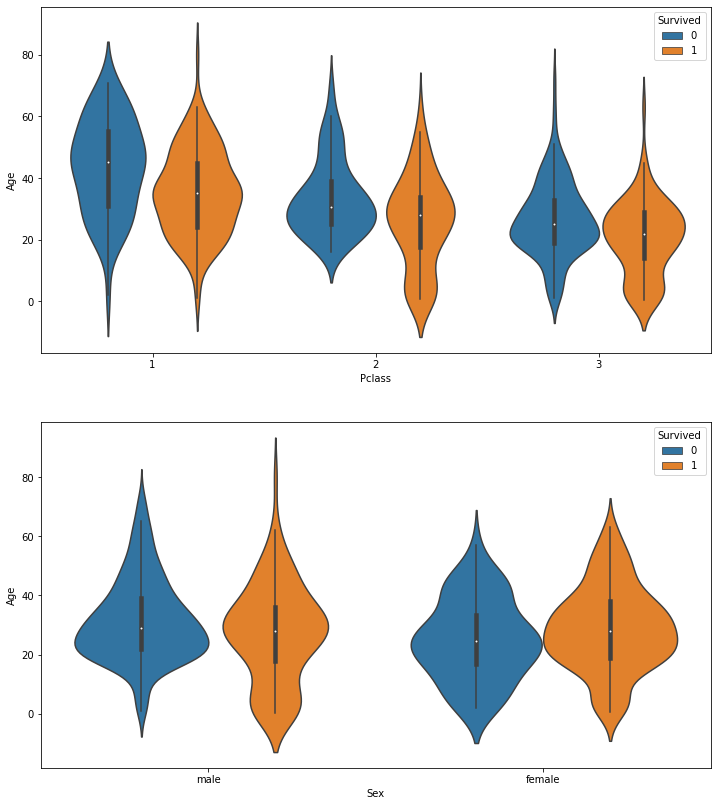

In [13]:
f, ax = plt.subplots(2,1,figsize=(12,14))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=data,ax=ax[0])
sns.violinplot(x="Sex",y="Age",hue="Survived",data=data,ax=ax[1])
plt.show()

Observations:
* The number of children increases with Pclass and the survival rate for passenegers below Age 10.
* Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
* For male, survival chance decreasing with growing age.

As there is almost 200 missing data in Age. I decided to check on people names like : Mr,Mrs. \
Using mean or median for whole age column might be missleading. \
We got a lot kid under 1 year old and couple of elders around 60+.

Lets take new column and group people by theire title.

In [14]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Lets make column Initial easier to read. We will replace people like "Capt" or "Don" with classic "Mr" so we will have less groups to deal with

In [17]:
pd.crosstab(data.Initial,data.Sex).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

After I checked mean of each category we will replace our NaN data.

In [19]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

Check if there is still any missing values.

In [20]:
data["Age"].isnull().sum()

0

So as we have all Age values lets look at distribution of data with Survival column.

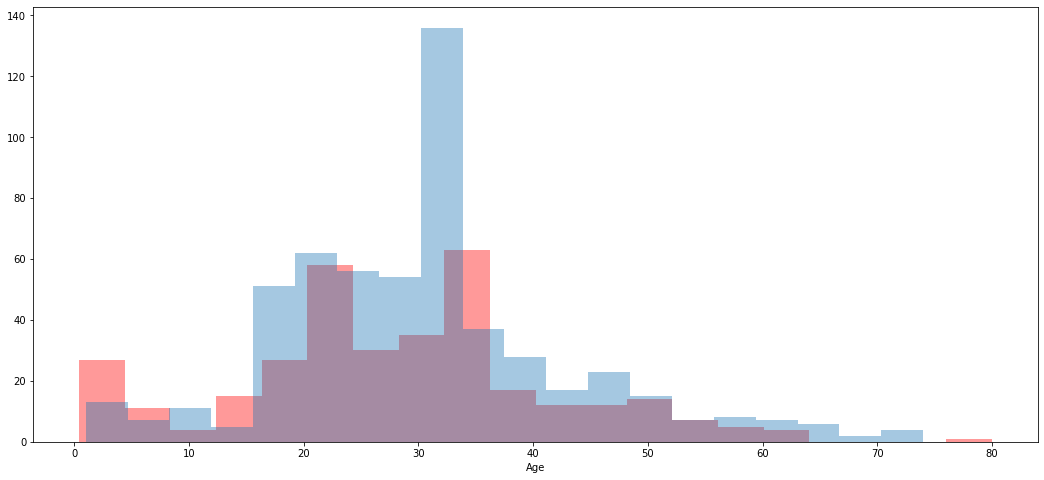

In [21]:
f, ax = plt.subplots(figsize=(18,8))
sns.distplot(data[data['Survived']==1].Age,kde=False,label="Survived",bins=20,color='red')
sns.distplot(data[data['Survived']==0].Age,kde=False,label="Dead",bins=20)
plt.show()

**Observation**
* Most of kids age<5 were saved from the disaster
* The oldest passsanger was saved
* Maximum number of deaths was between 30-40 years old.

**Does embarked matters ?**

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

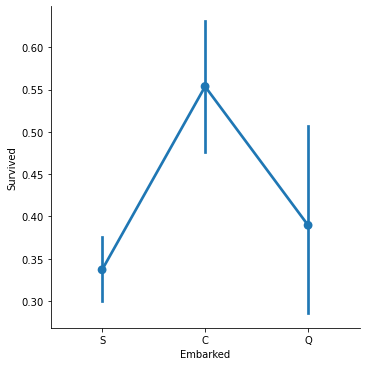

In [23]:
sns.factorplot('Embarked','Survived',data=data)
plt.show()

The chances for survival for Port C is highest, around 0.55 while the lowest is S and its close to Q by chances.

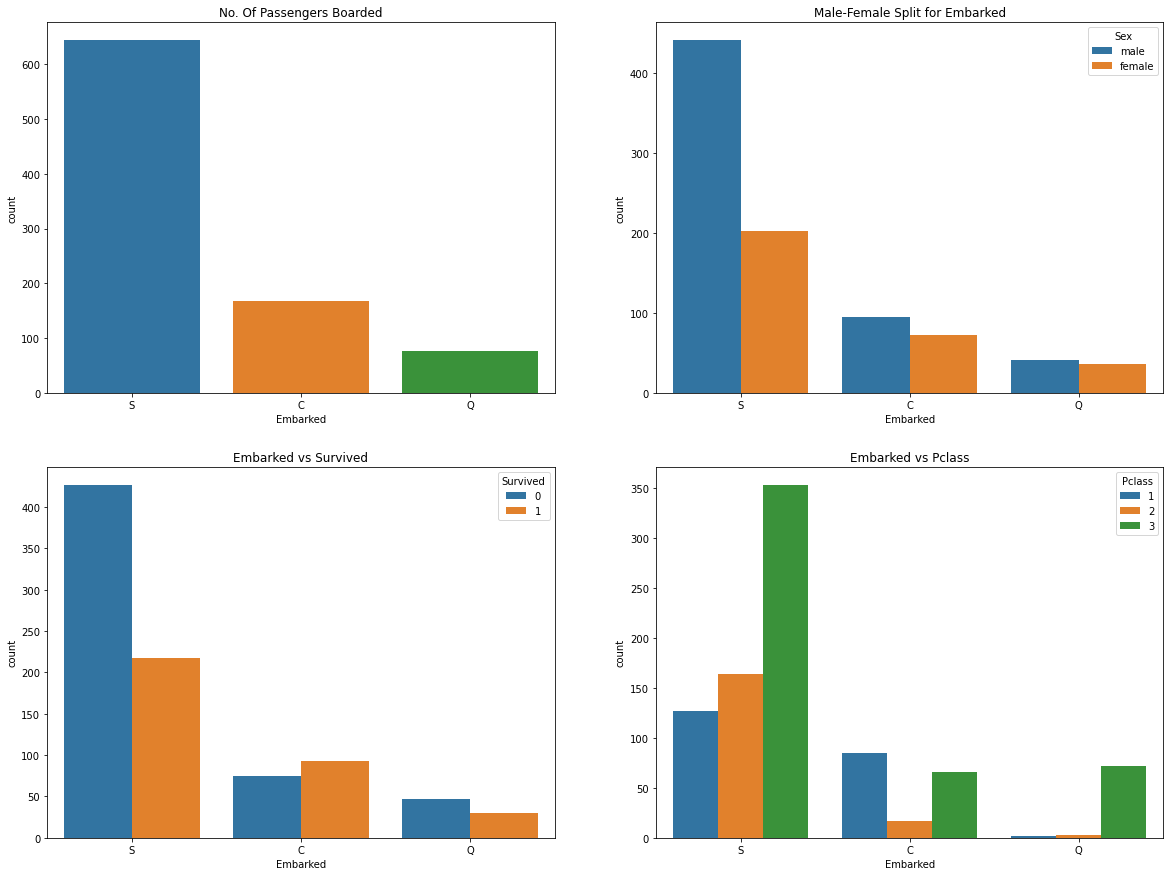

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

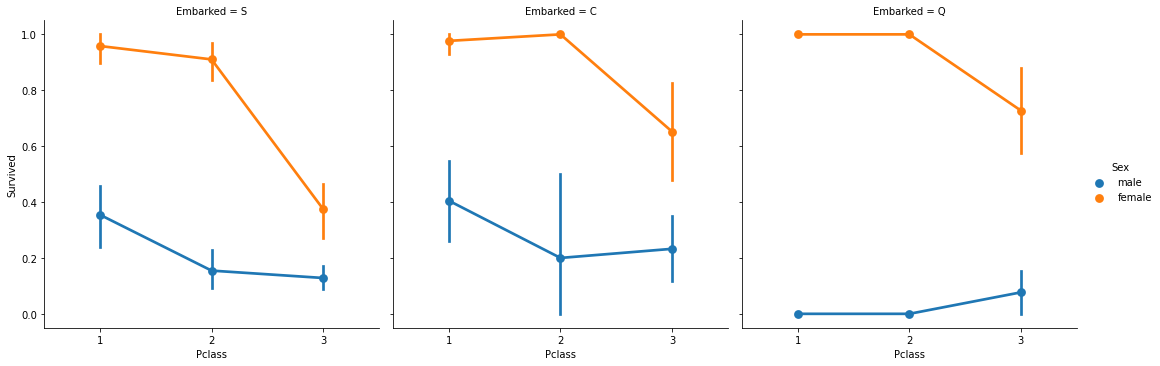

In [25]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**Observation**
* most of the people embarked from S. Majority of them were from Pclass 3.
* Port 2=Q had basicly only people from Pclass 3.
* Majority of Pclass 1 people embarked from S.
* People who embarked from 1=C survived in more than 50% cases.

As there is most of the people who embarked from S. I will fill missing data with "S".

In [26]:
data['Embarked'].fillna('S',inplace=True)
data["Embarked"].isnull().sum()

0

**Lets look at the SibSp features**

In [27]:
pd.crosstab([data.SibSp],data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


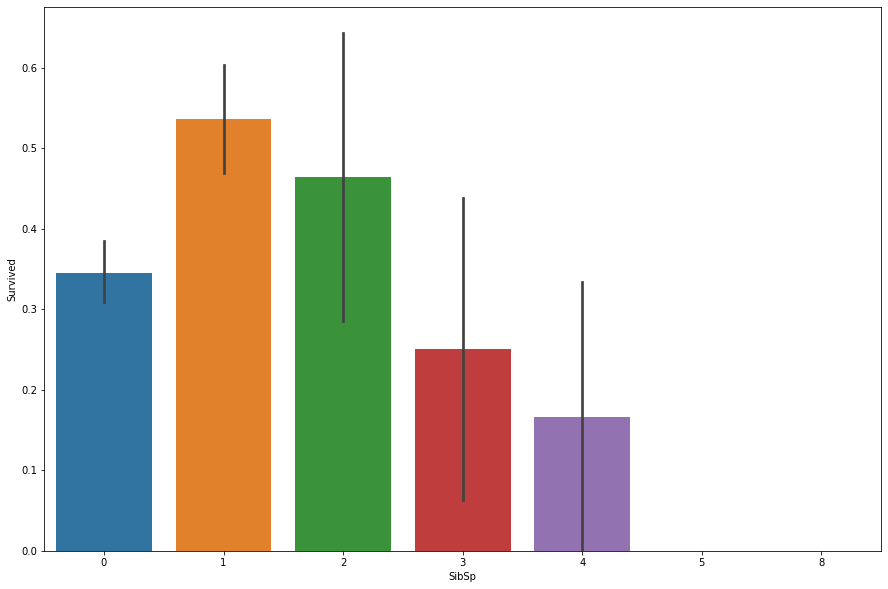

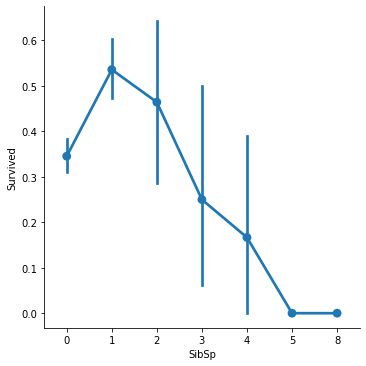

In [28]:
f,ax=plt.subplots(figsize=(15,10))
sns.barplot(x="SibSp",y="Survived",data=data)
sns.factorplot('SibSp','Survived',data=data)
plt.show()

The graph shows that people without sibling had really poor chances to survie around 35%. The highest survivality % is where people have 1 or 2 siblings after that number the chances are decreasing, that might be correlated with Pclass.

In [29]:
pd.crosstab(data.SibSp,data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [30]:
pd.crosstab(data.Parch,data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Yea, the reason why people with more than 2 sibling had lower chances to survive is becouse they were all in Pclass 3.

**Lets look at the prices of the tickets in each Pclass.**

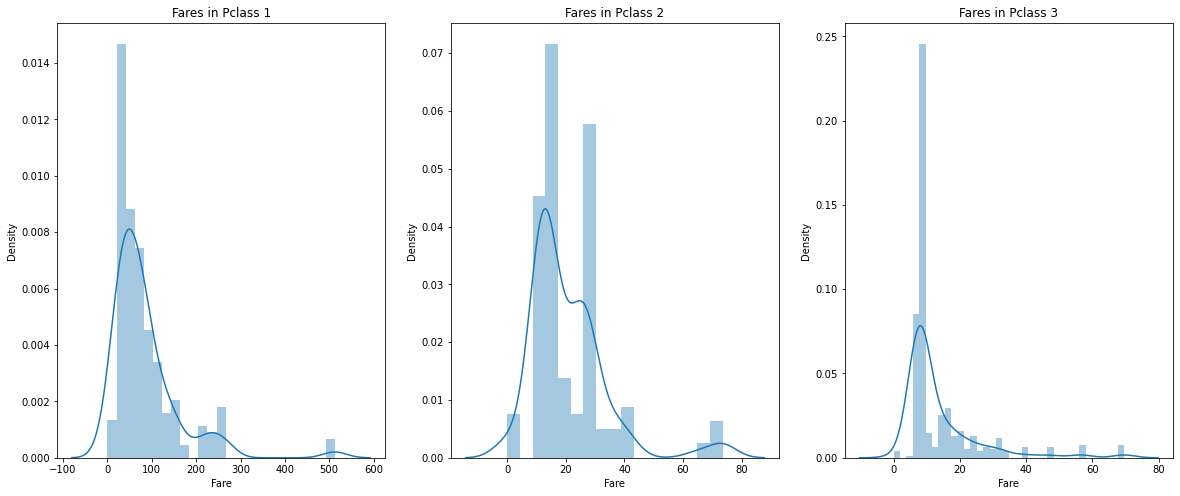

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

**Overal conclusion after checking all of the features**

Conclusion after EDA:

* Sex:female survival rate was way higher than man.
* Pclass:Seems like people with Pclass 1 had more chance to survive than Pclass 3.Rich people seems to had easier.
* Age:A lot od 0-10 y/o kids survived while passangers between 15-35 died most of the time.
* Embarked:All passangers embarked from Q were Pclass 3 while the biggest part of Pclass 1 embarked from S.
* Parch+SibSP:having 1-2 siblings shows greater chance to sruvive compare to 0 or 5-8 siblings thats because they were in Pclass 3.

